In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import jax
import timecast as tc
from timecast.utils.experiment import experiment
import pandas as pd
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model, Model
from tqdm.notebook import tqdm
import binpacking
import pickle

/home/dsuo/miniconda3/envs/skgaip/lib/python3.7/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
Using TensorFlow backend.


In [ ]:
data = np.load('data/fusion/FRNN_1d_sample/shot_data.npz', allow_pickle=True)
shot_data = data['shot_data'].item()

In [134]:
train_keys = np.load('data/fusion/FRNN_1d_sample/train_list.npy')

In [191]:
shot = list(shot_data.keys())[0]
shot = 158891
history_len = 200
learning_rate = 1e-5

In [192]:
import jax
import pickle
import jax.numpy as jnp

from timecast.modules import AR
from timecast.optim import SGD, NormThreshold

MSE = lambda true, pred: jnp.square(jnp.asarray(true) - jnp.asarray(pred)).mean()

ar = AR(history_len, 1, 1)

data = pickle.load(open(f"data/fusion/original/{shot}.pkl", "rb"))

# Locked mode amplitude
xs = data
xs, ts, s = xs[:-30, 3], xs[1:-29, 3], xs[30:, 3]

sgd = SGD(learning_rate=learning_rate)
# nl_k = NormThreshold(0.001, filter=lambda x: "kernel" in x)
# nl_b = NormThreshold(1e-4, filter=lambda x: "bias" in x)
def loop(module, xy):
    x, y = xy
    pred = module(x)
    module = sgd(module, x, y)
#     module = nl_k(module)
#     module = nl_b(module)

    return module, pred

ar, ys = jax.lax.scan(loop, ar, (xs, ts))

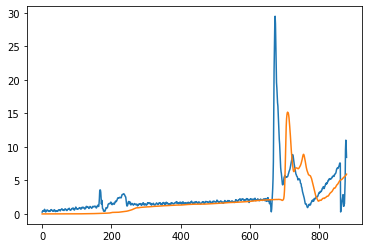

In [193]:
plt.plot(s)
plt.plot(ys)

In [194]:
MSE(s.squeeze(), ys.squeeze())

DeviceArray(10.131337, dtype=float32)

In [195]:
MSE(s.squeeze(), xs.squeeze())

DeviceArray(13.176275, dtype=float32)